In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_table("D://mydata//ML Assignment//post-operative.txt",sep=',',header = None)

In [11]:
df.head(10)

,0,1,2,3,4,5,6,7,8
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
5,high,low,good,mid,stable,stable,unstable,15,S
6,mid,low,excellent,high,stable,stable,mod-stable,05,S
7,high,mid,excellent,mid,unstable,unstable,stable,10,S
8,mid,high,good,mid,stable,stable,stable,10,S
9,mid,low,excellent,mid,unstable,stable,mod-stable,10,S


In [12]:
df.columns = ['L-CORE','L-SURF','L-02','L-BP','SURF-STBL','CORE-STBL','BP-STBL','COMFORT','DECISION']

In [13]:
df.head()

,L-CORE,L-SURF,L-02,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,DECISION
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


In [14]:
df.isna().sum()

L-CORE       0
L-SURF       0
L-02         0
L-BP         0
SURF-STBL    0
CORE-STBL    0
BP-STBL      0
COMFORT      0
DECISION     0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   L-CORE     90 non-null     object
 1   L-SURF     90 non-null     object
 2   L-02       90 non-null     object
 3   L-BP       90 non-null     object
 4   SURF-STBL  90 non-null     object
 5   CORE-STBL  90 non-null     object
 6   BP-STBL    90 non-null     object
 7   COMFORT    90 non-null     object
 8   DECISION   90 non-null     object
dtypes: object(9)
memory usage: 6.5+ KB


In [16]:
df["COMFORT"].mask(df["COMFORT"] == "?", 10, inplace = True)

In [17]:
df['COMFORT'].value_counts()

10    65
15    19
10     3
05     2
07     1
Name: COMFORT, dtype: int64

In [18]:
df

,L-CORE,L-SURF,L-02,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,DECISION
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
...,...,...,...,...,...,...,...,...,...
85,mid,mid,excellent,mid,unstable,stable,stable,10,A
86,mid,mid,excellent,mid,unstable,stable,stable,15,S
87,mid,mid,good,mid,unstable,stable,stable,15,A
88,mid,mid,excellent,mid,unstable,stable,stable,10,A


In [53]:
df_features = ['L-CORE','L-SURF','L-02','L-BP','SURF-STBL','CORE-STBL','BP-STBL','COMFORT']

In [54]:
df_features

['L-CORE',
 'L-SURF',
 'L-02',
 'L-BP',
 'SURF-STBL',
 'CORE-STBL',
 'BP-STBL',
 'COMFORT']

In [45]:
df_target = ['DECISION']

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['L-CORE'] = le.fit_transform(df['L-CORE'])

le = LabelEncoder()
df['L-SURF'] = le.fit_transform(df['L-SURF'])

le = LabelEncoder()
df['L-02'] = le.fit_transform(df['L-02'])

le = LabelEncoder()
df['L-BP'] = le.fit_transform(df['L-BP'])

le = LabelEncoder()
df['SURF-STBL'] = le.fit_transform(df['SURF-STBL'])

le = LabelEncoder()
df['CORE-STBL']= le.fit_transform(df['CORE-STBL'])

le = LabelEncoder()
df['BP-STBL'] = le.fit_transform(df['BP-STBL'])

le = LabelEncoder()
df['DECISION'] = le.fit_transform(df['DECISION'])


In [22]:
x = df.iloc[:,:8].values
y = df.iloc[:,-1].values

# Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.20,random_state=1) 

In [25]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [26]:
y_pred = clf.predict(x_test)

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6111111111111112


In [89]:
clf = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=8,max_depth=3)
clf = clf.fit(x_train,y_train)

In [90]:
y_pred = clf.predict(x_test)

In [91]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8888888888888888


['L-CORE',
 'L-SURF',
 'L-02',
 'L-BP',
 'SURF-STBL',
 'CORE-STBL',
 'BP-STBL',
 'COMFORT']

In [62]:
independent_variables = list(set(df.columns.to_list()))

In [31]:
from sklearn import tree
import matplotlib.pyplot as plt

In [67]:
fig = plt.figure(figsize=(25,20))
graph = Source(tree.export_graphviz(clf,putfile = None,feature_names=independent_variables,class_names=['0','1','2'],filled=True)

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_19356/3827148434.py, line 2)

In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [98]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[14  0  0]
 [ 1  0  0]
 [ 1  0  2]]


<AxesSubplot:>

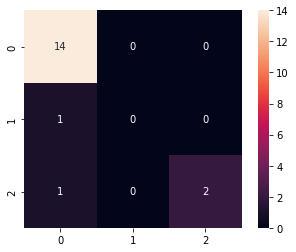

In [99]:
sns.heatmap(conf_matrix,square = True,annot = True)

# Random Forest classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [60]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [61]:
test_pred = classifier.predict(x_test)
train_pred = classifier.predict(x_train)

In [62]:
accuracy_score(y_test , test_pred)

0.6111111111111112

# KNN Classifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(n_neighbors = 13)
 
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [64]:
accuracy_score(pred , y_test)

0.7777777777777778